<a href="https://colab.research.google.com/github/ckrkc/Exploratory-Data-Analysis/blob/main/divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BOŞANMA VERİLERİ İLE EDA**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving divorce.csv to divorce.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("divorce.csv")

In [5]:
print(data.head())

  divorce_date     dob_man education_man  income_man   dob_woman  \
0   2006-09-06  1975-12-18     Secondary      2000.0  1983-08-01   
1   2008-01-02  1976-11-17  Professional      6000.0  1977-03-13   
2   2011-01-02  1969-04-06   Preparatory      5000.0  1970-02-16   
3   2011-01-02  1979-11-13     Secondary     12000.0  1981-05-13   
4   2011-01-02  1982-09-20  Professional      6000.0  1988-01-30   

  education_woman  income_woman marriage_date  marriage_duration  num_kids  
0       Secondary        1800.0    2000-06-26                5.0       1.0  
1    Professional        6000.0    2001-09-02                7.0       NaN  
2    Professional        5000.0    2000-02-02                2.0       2.0  
3       Secondary       12000.0    2006-05-13                2.0       NaN  
4    Professional       10000.0    2007-08-06                3.0       NaN  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB
None


In [7]:
print(data.describe())

         income_man  income_woman  marriage_duration     num_kids
count   2209.000000   2209.000000        2209.000000  1333.000000
mean    7922.986410   6793.164545           9.606609     1.672918
std     7693.796497   6562.928689           7.266696     0.732858
min        3.000000      3.500000           1.000000     1.000000
25%     3600.000000   3000.000000           4.000000     1.000000
50%     6000.000000   5000.000000           8.000000     2.000000
75%    10000.000000   8000.000000          14.000000     2.000000
max    80000.000000  90000.000000          32.000000     5.000000


In [8]:
#Tarih sütunlarını datetime formatına çevirme
data["divorce_date"]=pd.to_datetime(data["divorce_date"])
data["dob_man"]=pd.to_datetime(data["dob_man"])
data["dob_woman"]=pd.to_datetime(data["dob_woman"])
data["marriage_date"]=pd.to_datetime(data["marriage_date"])

In [9]:
#Eksik verileri bulma
print(data.isnull().sum())

#Eksik değer yüzdesi
print(data.isnull().mean()*100)

divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: int64
divorce_date          0.000000
dob_man               0.000000
education_man         0.181077
income_man            0.000000
dob_woman             0.000000
education_woman       0.000000
income_woman          0.000000
marriage_date         0.000000
marriage_duration     0.000000
num_kids             39.655953
dtype: float64


In [31]:
#education_man sütunundaki eksik verileri doldur
data["education_man"].fillna(data["education_man"].mode()[0])

#num_kids sütunundaki eksik verileri doldur
data["num_kids"].fillna(data["num_kids"].mean())

,num_kids
0,1.000000
1,1.672918
2,2.000000
3,1.672918
4,1.672918
...,...
2204,1.672918
2205,1.672918
2206,1.672918
2207,1.672918


In [33]:
data.isnull().sum()

,0
divorce_date,0
dob_man,0
education_man,0
income_man,0
dob_woman,0
education_woman,0
income_woman,0
marriage_date,0
marriage_duration,0
num_kids,0


In [34]:
#Yalnızca sayısal sütunları seçme
numeric_data = data.select_dtypes(include=[np.number])

#Korelasyon matrisini hesaplama
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                   income_man  income_woman  marriage_duration  num_kids
income_man           1.000000      0.318047           0.085321  0.032653
income_woman         0.318047      1.000000           0.078677 -0.015379
marriage_duration    0.085321      0.078677           1.000000  0.347479
num_kids             0.032653     -0.015379           0.347479  1.000000


<Axes: >

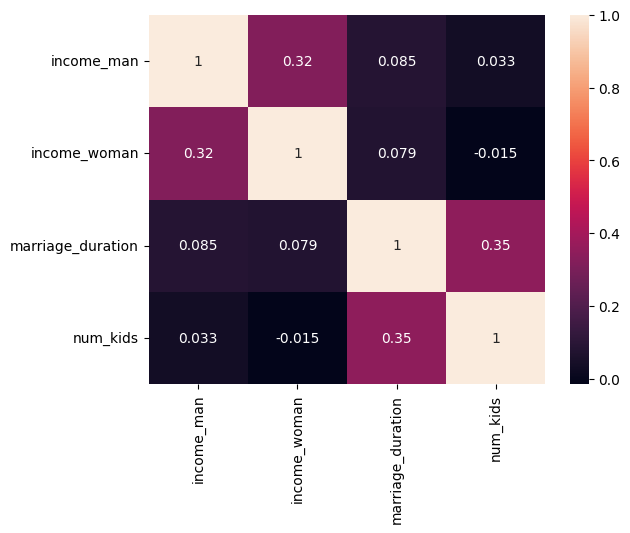

In [35]:
sns.heatmap(correlation_matrix, annot=True)

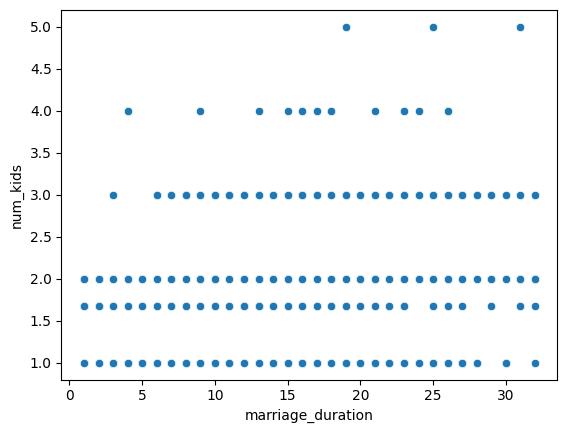

In [36]:
sns.scatterplot(data=data , x="marriage_duration" , y="num_kids")
plt.show()

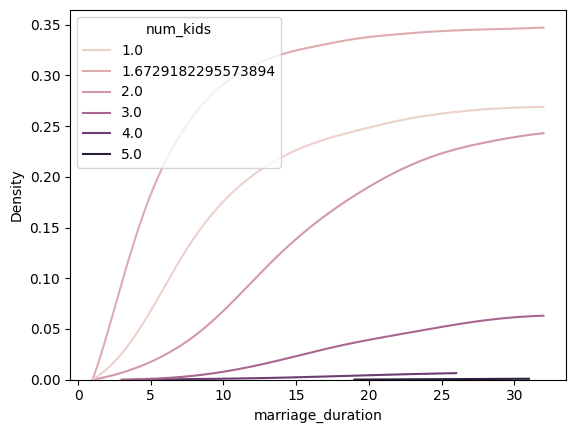

In [39]:
#Kümülatif dağılım fonksiyonu
sns.kdeplot(data=data, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()